In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scipy

In [381]:
train = pd.read_csv("Train_Big Mart Sales.txt", sep=",")

In [382]:
test = pd.read_csv("Test_Big Mart Sales.txt", sep=",")

In [383]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Univariate Analysis

1. Find out Numerical Columns
2. Categorical Columns

In [384]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [385]:
train.describe(include="float64")

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [386]:
train.describe(include="int64")

,Outlet_Establishment_Year
count,8523.000000
mean,1997.831867
std,8.371760
min,1985.000000
25%,1987.000000
50%,1999.000000
75%,2004.000000
max,2009.000000


In [387]:
train.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

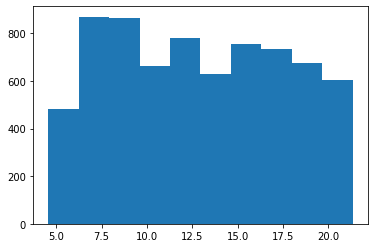

In [388]:
plt.hist(train[train["Item_Weight"].notnull()]["Item_Weight"])

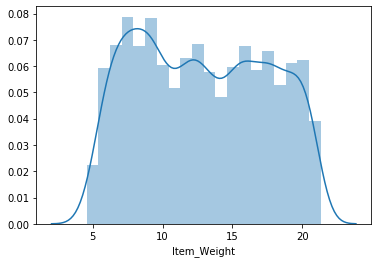

In [389]:
sns.distplot(train[train["Item_Weight"].notnull()]["Item_Weight"])

In [390]:
# Item weight is mostly uniform.

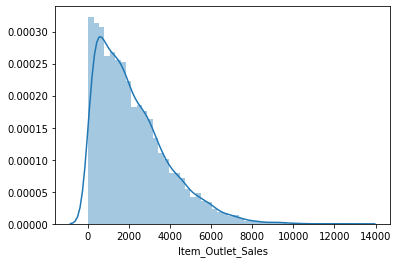

In [391]:
sns.distplot(train["Item_Outlet_Sales"])

In [392]:
# Outliers are present on the right, it is right skewed. It means most data is present on the left side
# Anamoly Found - Sales start from 0. Either discount is there, else it is a problem.

In [393]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

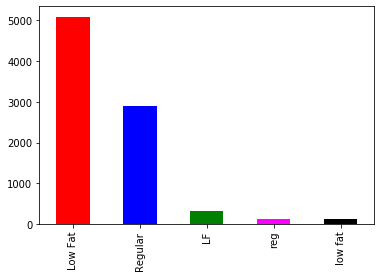

In [394]:
train["Item_Fat_Content"].value_counts().plot(kind="bar",color=["red","blue","green","magenta","black"])

In [395]:
# Rectify This

In [396]:
train["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat","Regular"],inplace=True)

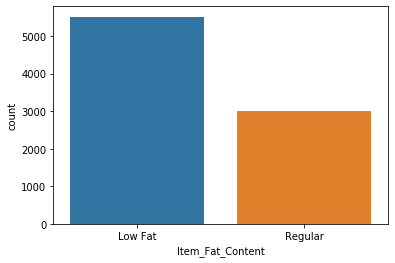

In [397]:
sns.countplot(train["Item_Fat_Content"])

In [398]:
# Rectifying in Test Dataset

In [399]:
test["Item_Fat_Content"].replace(["LF","low fat","reg"],["Low Fat","Low Fat","Regular"],inplace=True)

In [400]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

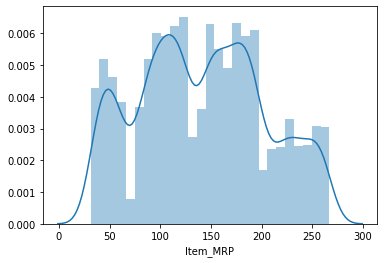

In [401]:
sns.distplot(train["Item_MRP"])

In [402]:
# We can see 4 modes

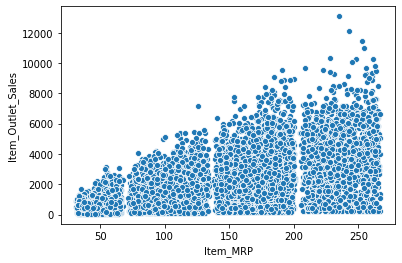

In [403]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=train)

In [404]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### I can see a probable feature engineering here
#### Feature Engineering
1. Price per unit = MRP/Weight

In [405]:
train.Item_Weight.isnull().sum().sum()

1463

### Bivariate Analysis

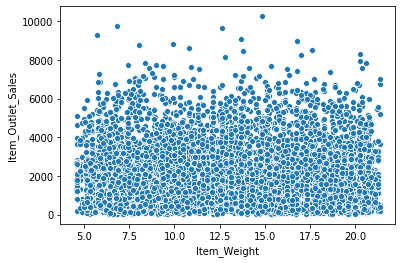

In [406]:
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=train)

In [407]:
# We cannot see any pattern between the item weight and the item outlet sales.

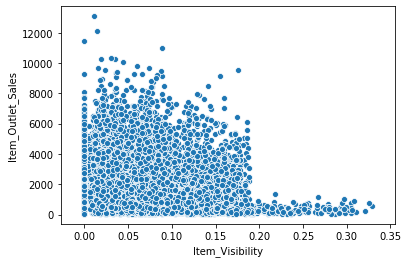

In [408]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=train)

In [409]:
# We can see the lesser the visibility of the item, the sales are higher. Higher visible items have less sales.
# Lots of zeroes are appearing in visibility.

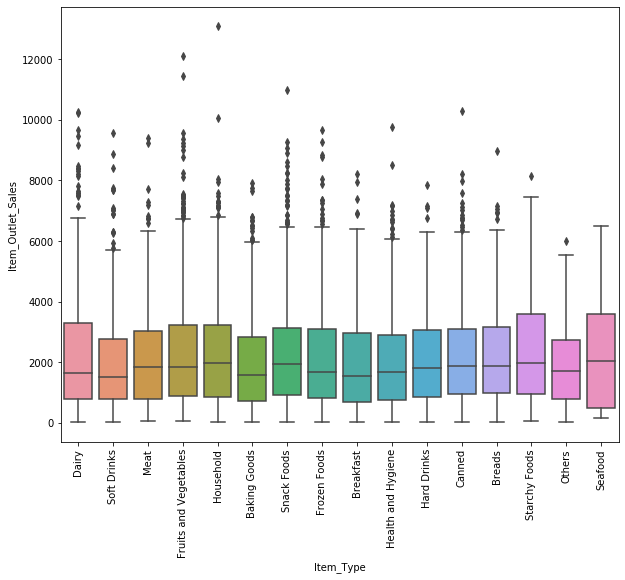

In [410]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Item_Type",y="Item_Outlet_Sales",data=train)
plt.xticks(rotation=90)
plt.show()

In [411]:
# Top 5 performing items are - Dairy, Fruits and vegetables, Household, Snack Foods, Frozen foods.

### Statistical Summary of Item Type vs Sales

In [412]:
train.Item_Type.nunique()

16

In [413]:
train.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


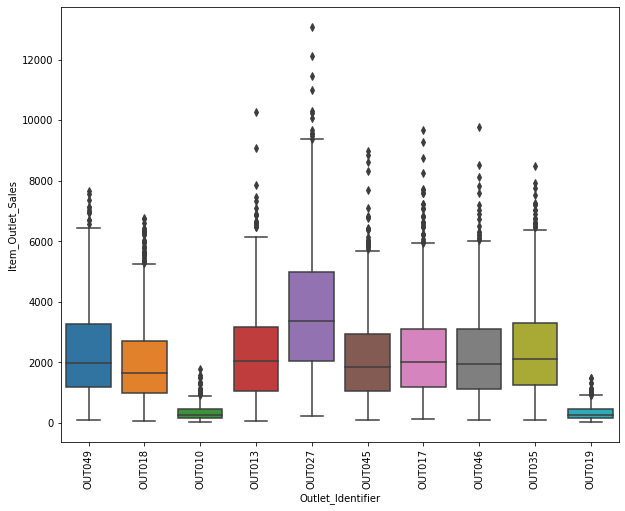

In [414]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=train)
plt.xticks(rotation=90)
plt.show()

In [415]:
train[train.Item_Outlet_Sales>8000]["Outlet_Identifier"]

333     OUT027
456     OUT027
472     OUT027
991     OUT027
997     OUT017
1009    OUT027
1254    OUT046
1450    OUT027
1998    OUT027
2109    OUT027
2216    OUT045
2293    OUT045
2535    OUT017
3098    OUT027
3154    OUT027
3286    OUT027
3709    OUT027
3757    OUT027
4289    OUT046
4346    OUT027
4349    OUT027
4681    OUT027
4772    OUT027
4888    OUT013
4961    OUT017
4991    OUT046
5065    OUT027
5185    OUT027
5223    OUT027
5500    OUT027
5619    OUT027
5752    OUT035
5977    OUT027
6134    OUT027
6409    OUT013
6537    OUT027
6541    OUT027
6606    OUT027
6886    OUT027
7016    OUT027
7076    OUT017
7188    OUT027
7191    OUT027
7256    OUT045
7343    OUT027
7752    OUT027
7826    OUT027
7930    OUT027
8039    OUT045
8201    OUT027
Name: Outlet_Identifier, dtype: object

In [416]:
train[train.Outlet_Identifier=="OUT027"]["Item_Type"].value_counts()

Fruits and Vegetables    140
Snack Foods              137
Household                 99
Frozen Foods              89
Canned                    72
Baking Goods              69
Dairy                     67
Health and Hygiene        60
Meat                      56
Soft Drinks               45
Breads                    31
Hard Drinks               23
Others                    15
Starchy Foods             14
Breakfast                 11
Seafood                    7
Name: Item_Type, dtype: int64

In [417]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [418]:
train[train.Outlet_Identifier=="OUT027"]["Outlet_Location_Type"].value_counts()

Tier 3    935
Name: Outlet_Location_Type, dtype: int64

In [419]:
train["Outlet_Vintage"] = 2013- train.Outlet_Establishment_Year

In [420]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [421]:
test["Outlet_Vintage"] = 2013- test.Outlet_Establishment_Year

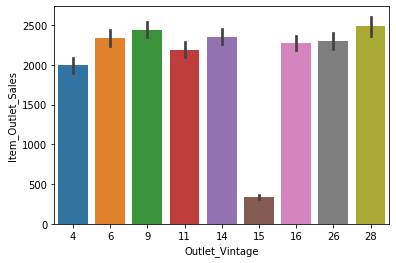

In [422]:
sns.barplot(x="Outlet_Vintage",y="Item_Outlet_Sales",data=train)

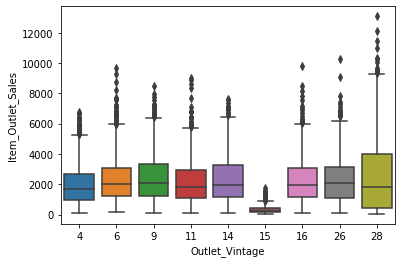

In [423]:
sns.boxplot(x="Outlet_Vintage",y="Item_Outlet_Sales",data=train)

In [424]:
# From the above graph we can just infer that the outlet which is 15 years old hasnt kept the brand value up to mark as
# compared to the rest of the outlets. No pattern found from the above graph of Outlet Vintage.

### Missing Values

In [425]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Vintage                  0
dtype: int64

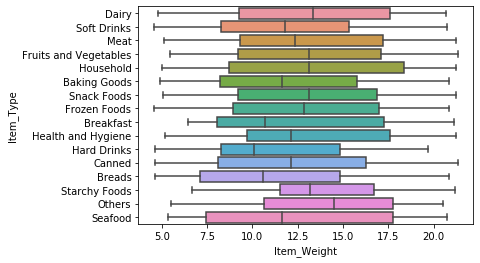

In [426]:
sns.boxplot(x="Item_Weight",y="Item_Type",data=train)

In [427]:
train.groupby("Item_Type")["Item_Weight"].sum()

Item_Type
Baking Goods              6580.530
Breads                    2314.775
Breakfast                 1136.370
Canned                    6632.775
Dairy                     7599.155
Frozen Foods              9238.550
Fruits and Vegetables    13476.040
Hard Drinks               2086.260
Health and Hygiene        5651.195
Household                10159.015
Meat                      4319.445
Others                    1897.900
Seafood                    640.195
Snack Foods              12832.025
Soft Drinks               4430.950
Starchy Foods             1779.795
Name: Item_Weight, dtype: float64

In [428]:
train[train.Item_Type=="Dairy"]["Item_Weight"].describe()

count    566.000000
mean      13.426069
std        4.686532
min        4.805000
25%        9.277500
50%       13.350000
75%       17.600000
max       20.700000
Name: Item_Weight, dtype: float64

In [429]:
train[train.Item_Type=="Baking Goods"]["Item_Weight"].describe()

count    536.000000
mean      12.277108
std        4.773622
min        4.880000
25%        8.235000
50%       11.650000
75%       15.750000
max       20.850000
Name: Item_Weight, dtype: float64

In [430]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [431]:
train[train.Item_Identifier=="NCD19"]["Item_Weight"]

4       8.93
522     8.93
802     8.93
2129    8.93
2907    8.93
3428    8.93
Name: Item_Weight, dtype: float64

In [432]:
train[train.Item_Identifier==""]["Item_Weight"].mean()

nan

In [433]:
weights = pd.Series()
for i in train.Item_Identifier.index:
    weights[str(i)] = train[train.Item_Identifier==train.Item_Identifier[i]]["Item_Weight"].mean()

In [434]:
len(weights)

8523

In [435]:
weights.head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
dtype: float64

In [436]:
train["Item_Weight"] = weights.values

In [437]:
train.Item_Weight.isnull().sum()

4

In [438]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Vintage                  0
dtype: int64

In [439]:
train[train.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,28


In [440]:
# Imputing the 4 missing values with median.
train.iloc[927,1] = 12.85
train.iloc[5022,1] = 11.65
train.iloc[1922,1] = 13.15
train.iloc[4187,1] = 13.35

In [441]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Vintage                  0
dtype: int64

In [442]:
# Item ID Type
train["Item_ID_Type"] = train["Item_Identifier"].str[:2]

In [443]:
# Read == Prem Asman - Chapter - Continuous probability distribution

In [444]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC


In [445]:
train.drop(columns="Item_Weights",axis=1,inplace=True)

KeyError: "['Item_Weights'] not found in axis"

In [ ]:
train.columns

In [446]:
train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [447]:
# Perishables
perishables = ['Dairy', 'Meat', 'Fruits and Vegetables','Breads', 'Starchy Foods','Breakfast', 'Seafood']

In [448]:
def perish(x):
    if (x in perishables):
        return("Perishables")
    else:
        return("Non_Perishables")

In [449]:
train["Item_Type_Category"] = train.Item_Type.apply(perish)

In [450]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type,Item_Type_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non_Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD,Perishables
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15,FD,Perishables
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non_Perishables


In [451]:
# Price Per Unit
train["Price_Per_Unit"] = train.Item_MRP/train.Item_Weight

In [452]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type,Item_Type_Category,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non_Perishables,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,FD,Perishables,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non_Perishables,6.031512


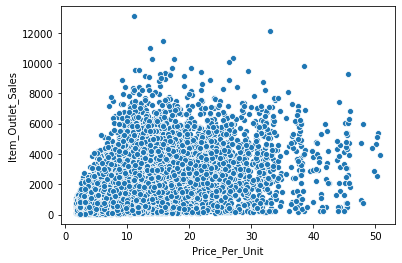

In [453]:
sns.scatterplot(x="Price_Per_Unit",y="Item_Outlet_Sales",data=train)

In [454]:
# The above graph shows

In [455]:
train.groupby("Outlet_Size")["Outlet_Type"].value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1     932
Medium       Supermarket Type3     935
             Supermarket Type1     930
             Supermarket Type2     928
Small        Supermarket Type1    1860
             Grocery Store         528
Name: Outlet_Type, dtype: int64

In [456]:
train[train.Outlet_Size.isnull()]["Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [457]:
train.Outlet_Size.replace(np.NaN,"Small",inplace=True)

In [458]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Vintage               0
Item_ID_Type                 0
Item_Type_Category           0
Price_Per_Unit               0
dtype: int64

### One Hot Encoding

In [459]:
## WE HAVE TO MAKE A DUMMY TRAIN TO PERFORM SCALING

In [460]:
train.Outlet_Identifier = np.where(train.Outlet_Identifier.isin(["OUT027"]),"OUT027","Others")

In [461]:
test.Outlet_Identifier = np.where(test.Outlet_Identifier.isin(["OUT027"]),"OUT027","Others")

In [462]:
dummy_train = pd.get_dummies(train.drop(["Item_Identifier","Outlet_Establishment_Year","Item_Type","Item_MRP"],axis=1))

In [463]:
dummy_test = pd.get_dummies(test.drop(["Item_Identifier","Outlet_Establishment_Year","Item_Type","Item_MRP"],axis=1))

In [464]:
dummy_train.head()

,Item_Weight,Item_Visibility,Item_Outlet_Sales,Outlet_Vintage,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Identifier_OUT027,Outlet_Identifier_Others,Outlet_Size_High,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_Type_DR,Item_ID_Type_FD,Item_ID_Type_NC,Item_Type_Category_Non_Perishables,Item_Type_Category_Perishables
0,9.30,0.016047,3735.1380,14,26.861204,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,5.92,0.019278,443.4228,4,8.153581,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
2,17.50,0.016760,2097.2700,14,8.092457,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
3,19.20,0.000000,732.3800,15,9.484115,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1
4,8.93,0.000000,994.7052,26,6.031512,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0


In [465]:
dummy_train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales', 'Outlet_Vintage',
       'Price_Per_Unit', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_Others', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_ID_Type_DR', 'Item_ID_Type_FD', 'Item_ID_Type_NC',
       'Item_Type_Category_Non_Perishables', 'Item_Type_Category_Perishables'],
      dtype='object')

### Scaling / Normalisation through Z Score

In [466]:
from sklearn.preprocessing import StandardScaler

In [517]:
ss = StandardScaler()    # We have initiated the machine

In [518]:
scaled_train = pd.DataFrame(ss.fit_transform(dummy_train),columns=dummy_train.columns)

In [519]:
sc = StandardScaler()

In [520]:
scaled_test = pd.DataFrame(sc.fit_transform(dummy_test),columns=dummy_test.columns)

### 1. Find the Average and Max Sales in the store.  2. Find out the probability of having sales more than the max sales in the store next year.


In [475]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [476]:
train.Item_Outlet_Sales.max()

13086.9648

In [477]:
train[train.Item_Outlet_Sales>13000]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type,Item_Type_Category,Price_Per_Unit
7188,NCE42,21.1,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648,28,NC,Non_Perishables,11.137242


In [478]:
import scipy.stats as scipy

In [479]:
len(train[train.Item_Outlet_Sales<=13000])/train.shape[0]

0.9998826704212131

In [480]:
1-scipy.binom.cdf(k=len(train[train.Item_Outlet_Sales<=13000]),n=train.shape[0],p=1/train.shape[0])

1.1102230246251565e-16

In [481]:
# What is the probability of Sales > 8000

In [482]:
len(train[train.Item_Outlet_Sales<=8000])

8473

In [483]:
len(train[train.Item_Outlet_Sales<=8000])/train.shape[0]

0.9941335210606594

In [484]:
1-scipy.binom.cdf(n= train.shape[0],k= 8473 ,p=0.9941335210606594 )

0.48102590505285625

In [485]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,Others,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,Others,2007,NaN,Tier 2,Supermarket Type1,6
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,Others,1998,NaN,Tier 3,Grocery Store,15
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,Others,2007,NaN,Tier 2,Supermarket Type1,6
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


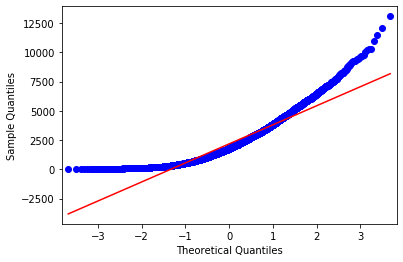

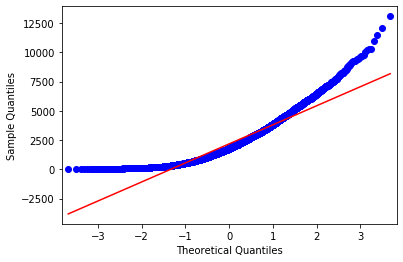

In [486]:
sm.qqplot(train.Item_Outlet_Sales,line="r")

In [487]:
# From the above graph we can infer that the data is not normal. We will have to transform it and scale it to get it
# normal.

#### Label Encoding/One Hot Encoding

In [488]:
from sklearn.preprocessing import LabelEncoder

In [489]:
lb_make = LabelEncoder()

In [490]:
train["Item_ID_Type_Code"] = lb_make.fit_transform(train["Item_ID_Type"])

In [491]:
train.Item_ID_Type.unique()

array(['FD', 'DR', 'NC'], dtype=object)

#### Linear Regression

In [266]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type,Item_Type_Category,Price_Per_Unit,Item_ID_Type_Code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,FD,Perishables,26.861204,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,DR,Non_Perishables,8.153581,0


In [267]:
train.shape

(8523, 17)

In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 17 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Outlet_Vintage               8523 non-null int64
Item_ID_Type                 8523 non-null object
Item_Type_Category           8523 non-null object
Price_Per_Unit               8523 non-null float64
Item_ID_Type_Code            8523 non-null int32
dtypes: float64(5), int32(1), int64(2), o

In [492]:
import numpy as np
import pandas as pd
import scipy.stats as scipy
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import pylab
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [270]:
# WHOLE DATA

In [271]:
lr = LinearRegression()

In [272]:
lr.fit(dummy_train.drop("Item_Outlet_Sales",axis=1),dummy_train.Item_Outlet_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [273]:
predict = lr.predict(dummy_train.drop("Item_Outlet_Sales",axis=1))

In [274]:
lr.coef_

array([   -9.32632591,  -301.67732792,    16.36365901,   -31.123239  ,
          -8.72257064,   -21.70658284,    21.70658284,    20.45851982,
         -13.28697158,   -21.76702893,    51.78158668,   -80.93489129,
          -5.71392   ,     2.8292277 ,   -28.41070185,     6.3096024 ,
         -16.4561347 ,   -27.19244581,    -4.67766572,   171.44895488,
           9.30111156,   -56.93218014,    -6.75706302,   497.60690432,
        -231.98525897,  -265.62164535,   197.2094744 ,    27.84805084,
        -225.05752524, -1623.52920432,  -108.62015504,  -371.20504517,
        2103.35440453,    33.7812924 ,   -18.95709438,   -14.82419802,
         -24.33978194,    24.33978194])

In [275]:
lr.intercept_

912.658063040938

In [276]:
r2_score(train.Item_Outlet_Sales,predict)

0.5634904911109979

In [277]:
np.sqrt(mean_squared_error(train.Item_Outlet_Sales,predict))

1127.3988044136618

In [278]:
model = sm.OLS(dummy_train.Item_Outlet_Sales,dummy_train.drop("Item_Outlet_Sales",axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.1
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:00:21   Log-Likelihood:                -71990.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.443e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Item_Weight                           -9.3263      5.209     -1.790      0.073     -19.537       0.884
Item_Visibility                     -301.6773    249.038     -1.211      0.226    -789.853     186.498
Item_MRP                              16.3637      0.422     38.772      0.000      15.536      17.191
Outlet_Vintage                       -31.1232     10.428     -2.985      0.003     -51.565     -10.682
Price_Per_Unit                        -8.7226      4.130     -2.112      0.035     -16.819      -0.626
Item_Fat_Content_Low Fat             174.7057     64.693      2.701      0.007      47.891     301.520
Item_Fat_Content_Regular             218.1189     65.564      3.327      0.001      89.598     346.640
Item_Type_Baking Goods                35.0579     54.952      0.638      0.524     -72.661     142.777
Item_Type_Breads                      13.8746     69.213      0.200      0.841    -121.800     149.549
Item_Type_Breakfast                    5.3946     97.729      0.055      0.956    -186.178     196.967
Item_Type_Canned                      66.3809     54.921      1.209      0.227     -41.277     174.039
Item_Type_Dairy                      -53.7733     50.991     -1.055      0.292    -153.729      46.182
Item_Type_Frozen Foods                 8.8854     51.642      0.172      0.863     -92.345     110.116
Item_Type_Fruits and Vegetables       29.9908     42.091      0.713      0.476     -52.517     112.499
Item_Type_Hard Drinks                -13.8113     99.030     -0.139      0.889    -207.934     180.311
Item_Type_Health and Hygiene          44.6754     46.004      0.971      0.332     -45.504     134.855
Item_Type_Household                   21.9096     41.005      0.534      0.593     -58.470     102.289
Item_Type_Meat                        -0.0308     56.694     -0.001      1.000    -111.165     111.104
Item_Type_Others                      33.6881     66.753      0.505      0.614     -97.164     164.541
Item_Type_Seafood                    198.6106    125.512      1.582      0.114     -47.424     444.645
Item_Type_Snack Foods                 23.9005     48.645      0.491      0.623     -71.456     119.257
Item_Type_Soft Drinks                -42.3328     87.086     -0.486      0.627    -213.043     128.377
Item_Type_Starchy Foods               20.4045     85.815      0.238      0.812    -147.813     188.622
Outlet_Size_High                     628.5485    216.167      2.908      0.004     204.809    1052.288
Outlet_Size_Medium                  -101.0437     64.655     -1.563      0.118    -227.784      25.696
Outlet_Size_Small                   -134.6801     48.414     -2.782      0.005    -229.582     -39.778
Outlet_Location_Type_Tier 1          328.1510    115.846      2.833      0.005     101.064     5

#### Backward Elimination (Feature Selection)

In [279]:
model = sm.OLS(dummy_train.Item_Outlet_Sales,dummy_train.drop(["Outlet_Type_Supermarket Type1","Outlet_Size_Small","Outlet_Size_Medium","Item_Type_Starchy Foods","Item_Type_Soft Drinks","Item_Type_Snack Foods","Item_Type_Seafood","Item_Type_Others","Item_Type_Meat","Item_Type_Household","Item_Type_Health and Hygiene","Item_Type_Hard Drinks","Item_Type_Fruits and Vegetables","Item_Type_Frozen Foods","Item_Type_Dairy","Item_Type_Canned","Item_Type_Breakfast","Item_Type_Breads","Item_Type_Baking Goods","Item_Outlet_Sales","Item_Weight","Item_Visibility","Price_Per_Unit"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     913.4
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:00:22   Log-Likelihood:                -71996.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8510   BIC:                         1.441e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Item_MRP                              15.5592      0.197     79.060      0.000      15.173      15.945
Outlet_Vintage                       -33.0383      9.680     -3.413      0.001     -52.013     -14.064
Item_Fat_Content_Low Fat              99.8529     30.357      3.289      0.001      40.347     159.359
Item_Fat_Content_Regular             140.0533     32.413      4.321      0.000      76.517     203.590
Outlet_Size_High                     791.3351    246.440      3.211      0.001     308.252    1274.418
Outlet_Location_Type_Tier 1          294.4058     82.358      3.575      0.000     132.964     455.848
Outlet_Location_Type_Tier 2           96.6807     33.611      2.876      0.004      30.794     162.567
Outlet_Location_Type_Tier 3         -151.1804     70.412     -2.147      0.032    -289.205     -13.156
Outlet_Type_Grocery Store          -1521.5168    137.601    -11.057      0.000   -1791.249   -1251.784
Outlet_Type_Supermarket Type2       -243.2334     84.533     -2.877      0.004    -408.939     -77.528
Outlet_Type_Supermarket Type3       2277.3479    264.767      8.601      0.000    1758.340    2796.356
Item_ID_Type_DR                       78.6490     35.661      2.205      0.027       8.745     148.553
Item_ID_Type_FD                       90.8534     26.228      3.464      0.001      39.440     142.267
Item_ID_Type_NC                       70.4038     31.700      2.221      0.026       8.264     132.544
Item_Type_Category_Non_Perishables   112.4678     30.042      3.744      0.000      53.578     171.358
Item_Type_Category_Perishables       127.4384     32.565      3.913      0.000      63.604     191.273
==============================================================================
Omnibus:                      959.502   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2288.208
Skew:                           0.666   Prob(JB):                         0.00
Kurtosis:                       5.160   Cond. No.                     1.50e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.11e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [280]:
residual = dummy_train.Item_Outlet_Sales - predict

In [281]:
round(residual.mean())

0

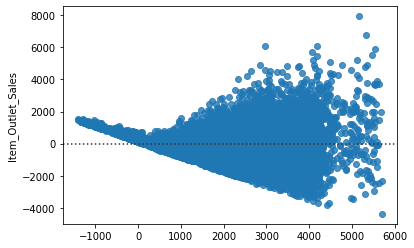

In [282]:
# Residual Plot (predicted vs residual) - 1st Assumption Check
sns.residplot(x=predict,y=residual)

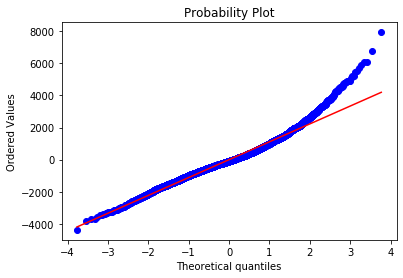

In [283]:
# Normality - 2nd Assumption Check - QQ plot and Shapiro test
scipy.probplot(residual,plot=pylab)
plt.show()

In [284]:
# Shapiro Test
teststats,pvalue = shapiro(residual)
print("Teststats is:",teststats)
print("PValue is:",pvalue)

Teststats is: 0.9712402820587158
PValue is: 3.6682269144705536e-38


C:\Users\Toshiba\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [285]:
# As Pvalue is greater than alpha(0.05), we fail to reject the null hypothesis which is residuals are normal.

In [286]:
#### MultiCollinearity Check - VIF
VIF = [variance_inflation_factor(dummy_train.values,i) for i in range(dummy_train.shape[1])]
VIF

C:\Users\Toshiba\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[3.9128732612145396,
 1.1033791328219469,
 5.4323735186888324,
 2.2909008386671483,
 50.97504142742649,
 7.346060396400181,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [287]:
pd.DataFrame({"VIF":VIF},index=dummy_train.columns)

,VIF
Item_Weight,3.912873
Item_Visibility,1.103379
Item_MRP,5.432374
Item_Outlet_Sales,2.290901
Outlet_Vintage,50.975041
Price_Per_Unit,7.346060
Item_Fat_Content_Low Fat,inf
Item_Fat_Content_Regular,inf
Item_Type_Baking Goods,inf
Item_Type_Breads,inf


In [288]:
# We are going to drop "Outlet Vintage" as the VIF exceeds the value of 10. There is too much variance.

In [289]:
model = sm.OLS(dummy_train.Item_Outlet_Sales,dummy_train.drop(["Outlet_Vintage","Outlet_Type_Supermarket Type1","Outlet_Size_Small","Outlet_Size_Medium","Item_Type_Starchy Foods","Item_Type_Soft Drinks","Item_Type_Snack Foods","Item_Type_Seafood","Item_Type_Others","Item_Type_Meat","Item_Type_Household","Item_Type_Health and Hygiene","Item_Type_Hard Drinks","Item_Type_Fruits and Vegetables","Item_Type_Frozen Foods","Item_Type_Dairy","Item_Type_Canned","Item_Type_Breakfast","Item_Type_Breads","Item_Type_Baking Goods","Item_Outlet_Sales","Item_Weight","Item_Visibility","Price_Per_Unit"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     994.1
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:00:29   Log-Likelihood:                -72002.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8511   BIC:                         1.441e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Item_MRP                              15.5532      0.197     78.984      0.000      15.167      15.939
Item_Fat_Content_Low Fat              14.9891     17.427      0.860      0.390     -19.172      49.150
Item_Fat_Content_Regular              55.7359     20.997      2.655      0.008      14.577      96.894
Outlet_Size_High                      -1.5770     82.301     -0.019      0.985    -162.906     159.752
Outlet_Location_Type_Tier 1           25.1288     23.650      1.063      0.288     -21.232      71.489
Outlet_Location_Type_Tier 2           36.5482     28.642      1.276      0.202     -19.597      92.694
Outlet_Location_Type_Tier 3            9.0479     52.512      0.172      0.863     -93.889     111.984
Outlet_Type_Grocery Store          -1951.0057     55.714    -35.018      0.000   -2060.219   -1841.792
Outlet_Type_Supermarket Type2       -309.3128     82.338     -3.757      0.000    -470.715    -147.910
Outlet_Type_Supermarket Type3       1418.3426     82.282     17.238      0.000    1257.050    1579.635
Item_ID_Type_DR                       22.2805     31.626      0.705      0.481     -39.714      84.275
Item_ID_Type_FD                       34.6846     20.436      1.697      0.090      -5.375      74.744
Item_ID_Type_NC                       13.7599     27.026      0.509      0.611     -39.218      66.737
Item_Type_Category_Non_Perishables    28.1338     17.099      1.645      0.100      -5.385      61.652
Item_Type_Category_Perishables        42.5912     21.049      2.023      0.043       1.331      83.852
==============================================================================
Omnibus:                      960.023   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.475
Skew:                           0.666   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                     1.92e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Heteroscedasticity Check

H0: Residuals are not heteroscedastic in nature.

H1: Residuals are heteroscedastic in nature.

In [290]:
het_goldfeldquandt(residual,dummy_train.drop("Item_Outlet_Sales",axis=1))

(0.9956230892255544, 0.5567213282757006, 'increasing')

In [291]:
if (0.5567213282757006>0.05):
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis")

We fail to reject the null hypothesis


In [292]:
# Which means Residuals are heteroscedastic in nature.

#### Durbin Watson Test

In [293]:
sms.durbin_watson(residual)

2.003484366963458

#### Linearity Check - Rainbow Test

In [294]:
sm.stats.diagnostic.linear_rainbow(model)

(1.0789609451163835, 0.006599766570232005)

#### Summary of tested assumptions:-

There was a trend/pattern found in the residual plot which doesnt meets the assumption of LR model.

In normality test, we saw that the shapiro wilk test gives a pvalue very near to zero which is lesser than the alpha - so it means we will reject the null hypothesis which is that the residuals are not normal.

In VIF test, we saw we saw that there is one feature which show that their VIF value is greater than 10. Regression is not the best bet here.

Heteroscedasticity - we did goldfendquandt test which gives a pvalue of 0.5567213282757006 which strongly indicates that the errors/data is heteroscedastic and therefore we cannot deploy LR.

Auto correlation - Durbin watson test of correlation - Test statistic indicates error in correlation and it says LR is not correct.

Data appears to be linear in nature as the rainbow test Pvalue is .

In [306]:
LR = LinearRegression()

In [307]:
x = dummy_train.drop("Item_Outlet_Sales",axis=1)
y = dummy_train.Item_Outlet_Sales

In [308]:
xtrain.shape

(6818, 38)

In [309]:
xtest.shape

(1705, 38)

In [310]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
ypredict = LR.predict(xtest)

In [312]:
r2_score(xtest,ypredict)

ValueError: y_true and y_pred have different number of output (38!=1)

In [302]:
np.sqrt(mean_squared_error(xtest,ypredict))

1133.2483230680543

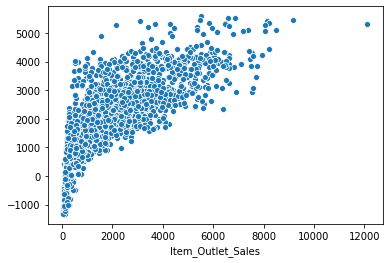

In [303]:
sns.scatterplot(ytest,ypredict)

In [304]:
model = sm.OLS(y,x).fit()

In [305]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     378.1
Date:                Tue, 27 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:00:38   Log-Likelihood:                -71990.
No. Observations:                8523   AIC:                         1.440e+05
Df Residuals:                    8493   BIC:                         1.443e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Item_Weight                           -9.3263      5.209     -1.790      0.073     -19.537       0.884
Item_Visibility                     -301.6773    249.038     -1.211      0.226    -789.853     186.498
Item_MRP                              16.3637      0.422     38.772      0.000      15.536      17.191
Outlet_Vintage                       -31.1232     10.428     -2.985      0.003     -51.565     -10.682
Price_Per_Unit                        -8.7226      4.130     -2.112      0.035     -16.819      -0.626
Item_Fat_Content_Low Fat             174.7057     64.693      2.701      0.007      47.891     301.520
Item_Fat_Content_Regular             218.1189     65.564      3.327      0.001      89.598     346.640
Item_Type_Baking Goods                35.0579     54.952      0.638      0.524     -72.661     142.777
Item_Type_Breads                      13.8746     69.213      0.200      0.841    -121.800     149.549
Item_Type_Breakfast                    5.3946     97.729      0.055      0.956    -186.178     196.967
Item_Type_Canned                      66.3809     54.921      1.209      0.227     -41.277     174.039
Item_Type_Dairy                      -53.7733     50.991     -1.055      0.292    -153.729      46.182
Item_Type_Frozen Foods                 8.8854     51.642      0.172      0.863     -92.345     110.116
Item_Type_Fruits and Vegetables       29.9908     42.091      0.713      0.476     -52.517     112.499
Item_Type_Hard Drinks                -13.8113     99.030     -0.139      0.889    -207.934     180.311
Item_Type_Health and Hygiene          44.6754     46.004      0.971      0.332     -45.504     134.855
Item_Type_Household                   21.9096     41.005      0.534      0.593     -58.470     102.289
Item_Type_Meat                        -0.0308     56.694     -0.001      1.000    -111.165     111.104
Item_Type_Others                      33.6881     66.753      0.505      0.614     -97.164     164.541
Item_Type_Seafood                    198.6106    125.512      1.582      0.114     -47.424     444.645
Item_Type_Snack Foods                 23.9005     48.645      0.491      0.623     -71.456     119.257
Item_Type_Soft Drinks                -42.3328     87.086     -0.486      0.627    -213.043     128.377
Item_Type_Starchy Foods               20.4045     85.815      0.238      0.812    -147.813     188.622
Outlet_Size_High                     628.5485    216.167      2.908      0.004     204.809    1052.288
Outlet_Size_Medium                  -101.0437     64.655     -1.563      0.118    -227.784      25.696
Outlet_Size_Small                   -134.6801     48.414     -2.782      0.005    -229.582     -39.778
Outlet_Location_Type_Tier 1          328.1510    115.846      2.833      0.005     101.064     5

#### Test set null value imputation

In [493]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Vintage                  0
dtype: int64

In [494]:
weights = pd.Series()
for i in test.Item_Identifier.index:
    weights[str(i)] = test[test.Item_Identifier==test.Item_Identifier[i]]["Item_Weight"].mean()

In [495]:
test["Item_Weight"] = weights.values

In [496]:
test.Item_Weight.isnull().sum()

20

In [497]:
test.groupby("Item_Type")["Item_Weight"].median()

Item_Type
Baking Goods             11.850
Breads                   10.195
Breakfast                13.850
Canned                   11.800
Dairy                    12.950
Frozen Foods             11.600
Fruits and Vegetables    12.850
Hard Drinks              10.500
Health and Hygiene       12.550
Household                13.000
Meat                     12.150
Others                   13.850
Seafood                  11.650
Snack Foods              11.650
Soft Drinks              10.800
Starchy Foods            12.850
Name: Item_Weight, dtype: float64

In [498]:
test.iloc[58,1] = 11.650
test.iloc[482,1] = 11.650
test.iloc[882,1] = 11.650
test.iloc[1300,1] = 11.650
test.iloc[1571,1] = 11.650
test.iloc[2302,1] = 11.650
test.iloc[3619,1] = 11.650
test.iloc[3909,1] = 11.650
test.iloc[4298,1] = 11.650
test.iloc[884,1] = 12.850
test.iloc[1297,1] = 12.850
test.iloc[1741,1] = 12.850
test.iloc[4496,1] = 12.850
test.iloc[1203,1] = 11.800
test.iloc[2600,1] = 11.800
test.iloc[3734,1] = 10.500
test.iloc[3875,1] = 13.000
test.iloc[5346,1] = 11.600
test.iloc[5609,1] = 11.600
test.iloc[5615,1] = 11.600

In [499]:
test[test.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage


In [500]:
train[train.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,Item_ID_Type,Item_Type_Category,Price_Per_Unit,Item_ID_Type_Code
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,Others,1998,Small,Tier 3,Grocery Store,732.3800,15,FD,Perishables,9.484115,1
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,Others,1987,High,Tier 3,Supermarket Type1,994.7052,26,NC,Non_Perishables,6.031512,2
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,Others,2009,Medium,Tier 3,Supermarket Type2,556.6088,4,FD,Non_Perishables,4.944762,1
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,Others,1999,Medium,Tier 1,Supermarket Type1,1516.0266,14,FD,Perishables,3.859339,1
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,Others,2009,Medium,Tier 3,Supermarket Type2,3068.0064,4,FD,Non_Perishables,13.725519,1
33,FDO23,17.850,Low Fat,0.0,Breads,93.1436,Others,2002,Small,Tier 2,Supermarket Type1,2174.5028,11,FD,Perishables,5.218129,1
46,NCP05,19.600,Low Fat,0.0,Health and Hygiene,153.3024,Others,2002,Small,Tier 2,Supermarket Type1,2428.8384,11,NC,Non_Perishables,7.821551,2
60,FDM20,10.000,Low Fat,0.0,Fruits and Vegetables,246.9144,Others,2009,Medium,Tier 3,Supermarket Type2,3185.1872,4,FD,Perishables,24.691440,1
72,FDH35,18.250,Low Fat,0.0,Starchy Foods,164.7526,Others,2002,Small,Tier 2,Supermarket Type1,4604.6728,11,FD,Perishables,9.027540,1
79,FDV25,5.905,Low Fat,0.0,Canned,222.5456,Others,2002,Small,Tier 2,Supermarket Type1,5305.0944,11,FD,Non_Perishables,37.687655,1


In [501]:
train.Item_Visibility.median()

0.05393093400000001

In [502]:
train.Item_Visibility=train.Item_Visibility.replace(0,0.05393093400000001)

In [503]:
test[test.Item_Visibility==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage
56,FDA09,13.350,Regular,0.0,Snack Foods,179.6660,Others,1987,High,Tier 3,Supermarket Type1,26
90,FDN39,19.350,Regular,0.0,Meat,165.7816,Others,2002,NaN,Tier 2,Supermarket Type1,11
109,FDU14,17.750,Low Fat,0.0,Dairy,249.7750,Others,2009,Medium,Tier 3,Supermarket Type2,4
125,FDZ36,6.035,Regular,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3,28
140,DRF48,5.730,Low Fat,0.0,Soft Drinks,188.3898,Others,1998,NaN,Tier 3,Grocery Store,15
150,FDL46,20.350,Low Fat,0.0,Snack Foods,118.9466,Others,1999,Medium,Tier 1,Supermarket Type1,14
168,FDS48,15.150,Low Fat,0.0,Baking Goods,150.4708,Others,2002,NaN,Tier 2,Supermarket Type1,11
185,NCN18,8.895,Low Fat,0.0,Household,110.9544,Others,1999,Medium,Tier 1,Supermarket Type1,14
222,FDN34,15.600,Regular,0.0,Snack Foods,169.2132,Others,1997,Small,Tier 1,Supermarket Type1,16
230,FDY45,17.500,Low Fat,0.0,Snack Foods,255.2356,Others,1987,High,Tier 3,Supermarket Type1,26


In [504]:
test.Item_Visibility.median()

0.054154252

In [505]:
test.Item_Visibility = test.Item_Visibility.replace(0,0.054154252)

In [506]:
test["Item_Type_Category"] = test.Item_Type.apply(perish)

In [507]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Vintage,Item_Type_Category
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,Others,1999,Medium,Tier 1,Supermarket Type1,14,Non_Perishables
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,Others,2007,NaN,Tier 2,Supermarket Type1,6,Perishables
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,Others,1998,NaN,Tier 3,Grocery Store,15,Non_Perishables
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,Others,2007,NaN,Tier 2,Supermarket Type1,6,Non_Perishables
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,Perishables


In [508]:
test["Price_Per_Unit"] = test.Item_MRP/test.Item_Weight

In [509]:
test["Item_ID_Type"] = test["Item_Identifier"].str[:2]

In [510]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Outlet_Vintage                  0
Item_Type_Category              0
Price_Per_Unit                  0
Item_ID_Type                    0
dtype: int64

In [511]:
test.Outlet_Size.mode()

0    Medium
dtype: object

In [512]:
test.groupby("Outlet_Location_Type")["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small           972
                      Medium          620
Tier 2                Small           620
Tier 3                Medium         1242
                      High            621
Name: Outlet_Size, dtype: int64

In [513]:
pd.crosstab(test.Outlet_Location_Type,test.Outlet_Size)

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,620,972
Tier 2,0,0,620
Tier 3,621,1242,0


In [514]:
test.Outlet_Size.fillna("Small",inplace=True)

In [515]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Outlet_Vintage               0
Item_Type_Category           0
Price_Per_Unit               0
Item_ID_Type                 0
dtype: int64

In [367]:
dummy_test = pd.get_dummies(test.drop(["Item_Identifier","Outlet_Establishment_Year","Outlet_Identifier"],axis=1))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

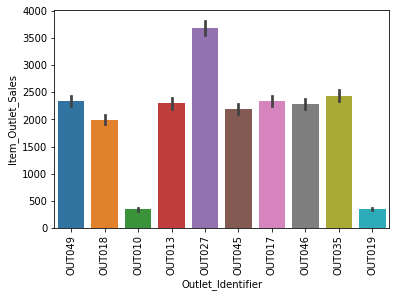

In [373]:
sns.barplot(train.Outlet_Identifier,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

### Scaled Train Model

In [526]:
from sklearn.linear_model import LinearRegression

In [525]:
LinReg = LinearRegression()
LinReg.fit(scaled_train,scaled_train.Item_Outlet_Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LinReg.predict(scaled_train)

In [527]:
from sklearn.linear_model import ridge_regression

In [533]:
r = ridge_regression(alpha=1,random_state=2)

TypeError: ridge_regression() missing 2 required positional arguments: 'X' and 'y'

In [528]:
from sklearn.linear_model import Lasso

In [530]:
l = Lasso(alpha=1,random_state=2)

In [ ]:
predict_lasso = l.fit(x_predictors,y).predict(scaled_test)

In [531]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Elastic Net combines the strengths of both Ridge and Lasso Regression.

In [532]:
Enet = ElasticNet(alpha=0.01,random_state=2)

In [ ]:
predict_enet = Enet.fit(x_predictors,y).predict(scaled_test)